In [163]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pylab as mp
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant

In [79]:
warnings.filterwarnings('ignore')

In [171]:
data=pd.read_csv("incumplimiento.csv",sep=",",header=0)
data.head(2)

Folio Incumplimiento Estudiante       Saldo       Ingreso
0      1             No         No  729.526495  44361.625074
1      2             No        Yes  817.180407  12106.134700

In [172]:
data['Estudiante_enc']=LabelEncoder().fit_transform(data['Estudiante']) 
data['Incumplimiento_enc']=LabelEncoder().fit_transform(data['Incumplimiento']) 
data.drop(["Incumplimiento","Estudiante"],axis=1,inplace=True)

In [173]:
data.head(2)

Folio       Saldo       Ingreso  Estudiante_enc  Incumplimiento_enc
0      1  729.526495  44361.625074               0                   0
1      2  817.180407  12106.134700               1                   0

In [174]:
X=data.iloc[:,1:4]
y=data.loc[:,"Incumplimiento_enc"]

In [175]:
model=LogisticRegression(C=100,solver='newton-cg',max_iter=10000).fit(X,y)
print(model.coef_[0])
print(model.intercept_)

[ 5.73480490e-03  2.98008688e-06 -6.47812403e-01]
[-10.86411812]


In [176]:
X0 = add_constant(X)
model0 = Logit(y,X0)
modelfit=model0.fit()
modelfit.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Incumplimiento_enc   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 Sep 2019   Pseudo R-squ.:                  0.4619
Time:                        22:41:49   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -10.8690      0.492    -22.079      0.000     -11.834      -9.904
Saldo              0.0057      0.000     24.737      0.000       0.005       0.006
Ingreso         3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
Estudiante_enc    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Segmentamos la población en buenos y morosos. La varibale estadísticamente significativa es el saldo 

In [177]:
clientes_buenos=data[data['Incumplimiento_enc']==1]
clientes_morosos=data[data['Incumplimiento_enc']==0]

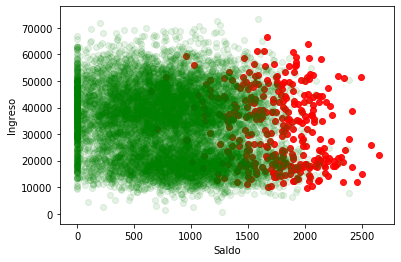

In [178]:
mp.xlabel('Saldo')
mp.ylabel('Ingreso')
mp.scatter(clientes_buenos.Saldo,clientes_buenos.Ingreso,color='red',label='',alpha=0.9,)
mp.scatter(clientes_morosos.Saldo,clientes_morosos.Ingreso,color='green',alpha=0.1)

In [181]:
#Modelo con solamente una covariable
saldo=data['Saldo']
model2=LogisticRegression(C=100,solver='newton-cg',max_iter =10000).fit(X.iloc[:,0:1],y)
print(model2.coef_[0])
print(model2.intercept_)

[0.00549892]
[-10.65132989]


In [184]:
X_t=np.linspace(saldo.min(),saldo.max(),len(y)).reshape(-1,1)
yprob=model2.predict_proba(X_t)
yp=model2.predict(X.iloc[:,0:1])

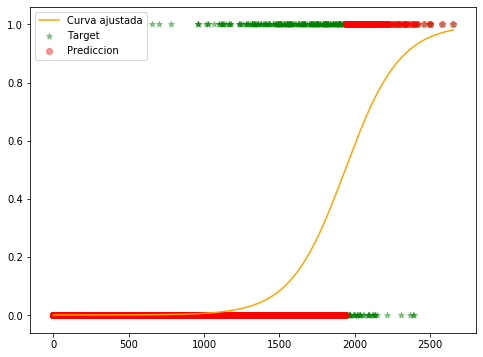

In [185]:
plt.figure(figsize=(8,6))
mp.scatter(saldo,y,color=['green'],label='Target',marker='*',alpha=0.4)
mp.scatter(saldo,yp,color='red',label='Prediccion',marker='o',alpha=0.4)
mp.plot(X_t,yprob[:,1],color='orange', label='Curva ajustada')
mp.legend()

In [186]:
#Modelo construido con datos de entrenamiendo 70% de la muestra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [187]:
model=LogisticRegression(C=1,solver='newton-cg',max_iter =10000).fit(X_train,y_train)
print(model.coef_[0])
print(model.intercept_)

[ 5.69055039e-03 -7.15066981e-06 -8.64441261e-01]
[-10.3368208]


In [188]:
yp0=model.predict(X_test)
accuracy_score(y_test, yp0, normalize=True) 

0.9743333333333334